In [88]:
# -*- coding: utf-8 -*-
"""
Created on Mon Sep 23 16:28:46 2019

@author: Deepak
"""

import GravityMachineTrack
import imp
import msdanalyzer
import pandas as pd
import numpy as np
import os
imp.reload(GravityMachineTrack)
imp.reload(msdanalyzer)

import matplotlib.pyplot as plt
%matplotlib inline

    
#------------------------------------------------------------------------------------------------------------------------------    
# Define some constants for the data analysis:

minTrackDuration = 30
    
    
# Folder in which to save analysis results
saveFolder = 'C:/Users/deepak/Dropbox/GravityMachine/ExperimentResults/MSD_Analysis'
    
analysis_file = 'C:/Users/deepak/Dropbox/GravityMachine/GravityMachineAnalysis_Scripts/Dendraster.csv'

analysis_df = pd.read_csv(analysis_file)


pairwise_conditions = [(x,y) for x in analysis_df['Organism'] for y in analysis_df['Condition']]


# Create unique pairs between the Organism and Condition columns
used = set()
unique_conditions = [x for x in pairwise_conditions if x not in used and (used.add(x) or True)]
print(50*'-')
print('Unique condition : {}'.format(unique_conditions))
print(50*'-')

ensemble_tracks = []
TrackArray = []

nUniqueConditions = len(unique_conditions)

# Assemble the list of unique conditions i.e unique combinations of Organisms, Condition. Each Unique Condition will in general have several tracks

OrgDims = []
overwrite = False

for ii in range(nUniqueConditions):
    
    curr_Organism = unique_conditions[ii][0]
    curr_Condition = unique_conditions[ii][1]
    
    bool_Org = analysis_df['Organism'] == curr_Organism
    bool_Cond = analysis_df['Condition'] == curr_Condition
    
    
    # Check if the analysis data is already present on disk for this Organism, Condition
    if(overwrite is True or not os.path.exists(os.path.join(saveFolder, curr_Organism+'_'+curr_Condition+'_MSD.csv')) or not os.path.exists(os.path.join(saveFolder, curr_Organism+'_'+curr_Condition))):
        
        tracks_sameCondition = analysis_df[bool_Org & bool_Cond]
        
        nTracksSameCondition = len(tracks_sameCondition)
        
        for jj in range(nTracksSameCondition):
            
            Track_df = tracks_sameCondition.iloc[jj]
            
            
            
            print(Track_df)
            
            full_path = os.path.join(Track_df['rootFolder'],Track_df['trackFolder'], Track_df['trackFile'])
            
            
            track = GravityMachineTrack.gravMachineTrack(trackFile = full_path , organism = Track_df['Organism'], condition = Track_df['Condition'], Tmin = Track_df['Tmin'], Tmax = Track_df['Tmax'], findDims = True)
            
            try:
                OrgDims.append(track.OrgDim)
            except:
                temp = float(input('Enter Organism dimensions in mm'))
                track.OrgDim = temp
                    
            # Filter tracks based on min Track Duration
            if(track.trackDuration >= minTrackDuration):
                TrackArray.append(track)

    
    
    
        msd1 = msdanalyzer.msdanalyzer(Tracks = TrackArray, ensemble_method = 'subtrack', Organism = curr_Organism, Condition = curr_Condition, savePath = saveFolder)


    #    msd1 = msdanalyzer(testFlag=0)
    
        msd1.computeSqDisp(save = True)
        msd1.computeMSD(save = True, overwrite = False)
    
#       msd1.calculate_velocityDist()
        
    else:
        # If the precomputed trajectories and MSD data already exists then load them into memory
        
        msd1 = msdanalyzer.msdanalyzer(Tracks = None, ensemble_method = 'subtrack', Organism = curr_Organism, Condition = curr_Condition, savePath = saveFolder)
        
#        msd1.computeSqDisp(save = False, load = True)
        msd1.computeMSD(save = True, overwrite = False)

        
        
        
    
    


--------------------------------------------------
Unique condition : [('Dendraster', 'No light')]
--------------------------------------------------
Loading MSD trajectory from file ...
Loading MSD data from C:/Users/deepak/Dropbox/GravityMachine/ExperimentResults/MSD_Analysis\Dendraster_No light_MSD.csv


In [89]:
# Non-linear least-squares fitting Including Correlated Error

msd1.fitTrajectories(overwrite = True)

Loading trajectory : Dendraster_No light_trajectories0000.npz
Loading trajectory : Dendraster_No light_trajectories0001.npz
Loading trajectory : Dendraster_No light_trajectories0002.npz
Loading trajectory : Dendraster_No light_trajectories0003.npz
Loading trajectory : Dendraster_No light_trajectories0004.npz
Loading trajectory : Dendraster_No light_trajectories0005.npz
Loading trajectory : Dendraster_No light_trajectories0006.npz
Loading trajectory : Dendraster_No light_trajectories0007.npz
Loading trajectory : Dendraster_No light_trajectories0008.npz
Loading trajectory : Dendraster_No light_trajectories0009.npz
Loading trajectory : Dendraster_No light_trajectories0010.npz
Loading trajectory : Dendraster_No light_trajectories0011.npz
Loading trajectory : Dendraster_No light_trajectories0012.npz
Loading trajectory : Dendraster_No light_trajectories0013.npz
Loading trajectory : Dendraster_No light_trajectories0014.npz
Loading trajectory : Dendraster_No light_trajectories0015.npz
Loading 

Loading trajectory : Dendraster_No light_trajectories0194.npz
Loading trajectory : Dendraster_No light_trajectories0195.npz
Loading trajectory : Dendraster_No light_trajectories0196.npz
Loading trajectory : Dendraster_No light_trajectories0197.npz
Loading trajectory : Dendraster_No light_trajectories0198.npz
Loading trajectory : Dendraster_No light_trajectories0199.npz
Loading trajectory : Dendraster_No light_trajectories0200.npz
Loading trajectory : Dendraster_No light_trajectories0201.npz
Loading trajectory : Dendraster_No light_trajectories0202.npz
Loading trajectory : Dendraster_No light_trajectories0203.npz
Loading trajectory : Dendraster_No light_trajectories0204.npz
Loading trajectory : Dendraster_No light_trajectories0205.npz
Loading trajectory : Dendraster_No light_trajectories0206.npz
Loading trajectory : Dendraster_No light_trajectories0207.npz
Loading trajectory : Dendraster_No light_trajectories0208.npz
Loading trajectory : Dendraster_No light_trajectories0209.npz
Loading 

PermissionError: [Errno 13] Permission denied: 'C:/Users/deepak/Dropbox/GravityMachine/ExperimentResults/MSD_Analysis\\TaylorFunctionFitting_Analysis\\Dendraster_No light_TaylorFunctionFit.csv'

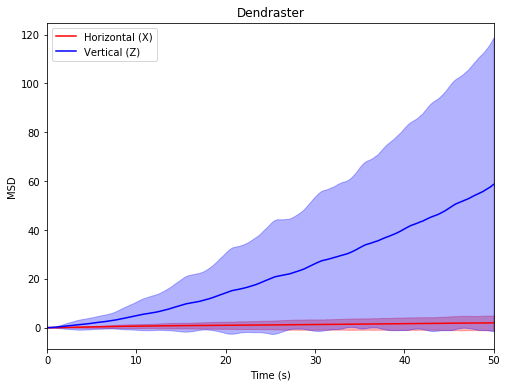

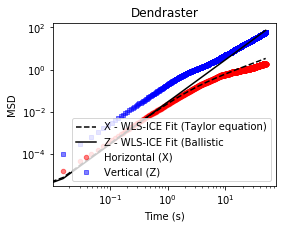

In [90]:
# Plot the MSD

msd1.plotMSD(figname = 1, plot_fit= True, savefig = True)

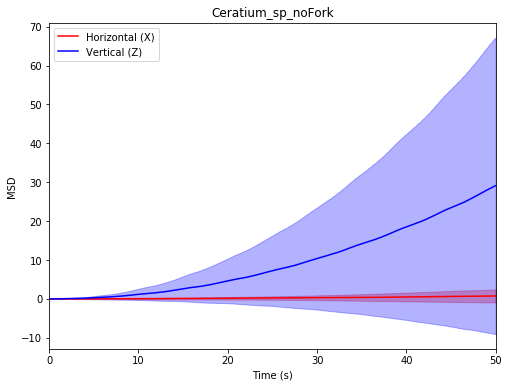

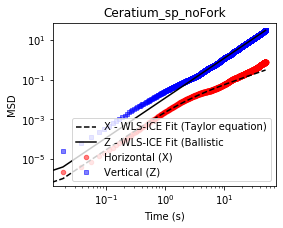

In [91]:
import msdanalyzer
imp.reload(msdanalyzer)
Delays_Z, Slope_Z = msd1.computeLocalSlope(msd1.delays, msd1.MSD_Z)
Delays_X, Slope_X = msd1.computeLocalSlope(msd1.delays, msd1.MSD_X)

print(Delays_Z)
print(Slope_Z)
print(Slope_X)

Window size 5(s)
Window size 5(s)
[1.55231295e-02 1.01552313e+00 2.01552313e+00 3.01552313e+00
 4.01552313e+00 5.01552313e+00 6.01552313e+00 7.01552313e+00
 8.01552313e+00 9.01552313e+00 1.00155231e+01 1.10155231e+01
 1.20155231e+01 1.30155231e+01 1.40155231e+01 1.50155231e+01
 1.60155231e+01 1.70155231e+01 1.80155231e+01 1.90155231e+01
 2.00155231e+01 2.10155231e+01 2.20155231e+01 2.30155231e+01
 2.40155231e+01 2.50155231e+01 2.60155231e+01 2.70155231e+01
 2.80155231e+01 2.90155231e+01 3.00155231e+01 3.10155231e+01
 3.20155231e+01 3.30155231e+01 3.40155231e+01 3.50155231e+01
 3.60155231e+01 3.70155231e+01 3.80155231e+01 3.90155231e+01
 4.00155231e+01 4.10155231e+01 4.20155231e+01 4.30155231e+01
 4.40155231e+01]
[1.6179071  1.27161699 1.19029062 1.2476239  1.35460114 1.46035908
 1.59193605 1.58682729 1.46499517 1.41623594 1.5011884  1.66764465
 1.67669652 1.52885138 1.41297903 1.48552174 1.68907592 1.7084781
 1.5520993  1.40503769 1.45119367 1.63828586 1.6307104  1.45417347
 1.2840862 

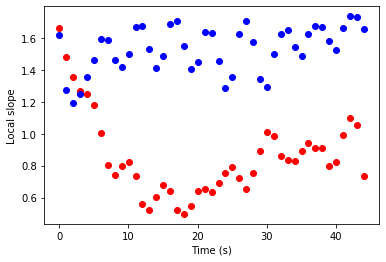

In [92]:
plt.figure()
plt.plot(Delays_X, Slope_X, 'ro')
plt.plot(Delays_Z, Slope_Z, 'bo')
plt.xlabel('Time (s)')
plt.ylabel('Local slope')
plt.show()

TypeError: list indices must be integers or slices, not tuple